In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
training_data = pd.read_csv(r"C:\Users\obsession\Desktop\Projeto DAA\DAA\Dataset\training_data.csv", encoding='latin-1')
test_data = pd.read_csv(r"C:\Users\obsession\Desktop\Projeto DAA\DAA\Dataset\test_data.csv", encoding='latin-1')

In [3]:
'''
Preparar o dataset
'''
#City name é sempre porto logo pode-se fazer drop
#Drop
training_data = training_data.drop(['city_name'], axis=1)
#Average percipitation é sempre 0 logo pode-se fazer drop
training_data = training_data.drop(['AVERAGE_PRECIPITATION'], axis=1)


#Remover outliers
from scipy.stats.mstats import winsorize
training_data['AVERAGE_FREE_FLOW_SPEED']=winsorize(training_data['AVERAGE_FREE_FLOW_SPEED'],(0.01,0.02))
training_data['AVERAGE_TIME_DIFF']=winsorize(training_data['AVERAGE_TIME_DIFF'],(0.01,0.01))
training_data['AVERAGE_FREE_FLOW_TIME']=winsorize(training_data['AVERAGE_FREE_FLOW_TIME'],(0.02,0.02))
training_data['AVERAGE_TEMPERATURE']=winsorize(training_data['AVERAGE_TEMPERATURE'],(0.01,0.02))
training_data['AVERAGE_ATMOSP_PRESSURE']=winsorize(training_data['AVERAGE_ATMOSP_PRESSURE'],(0.04,0.02))
training_data['AVERAGE_HUMIDITY']=winsorize(training_data['AVERAGE_HUMIDITY'],(0.03,0.02))
training_data['AVERAGE_WIND_SPEED']=winsorize(training_data['AVERAGE_WIND_SPEED'],(0.01,0.02))
#REMOVER OUTLIERS 
from scipy.stats.mstats import winsorize
test_data['AVERAGE_FREE_FLOW_SPEED']=winsorize(test_data['AVERAGE_FREE_FLOW_SPEED'],(0.01,0.02))
test_data['AVERAGE_TIME_DIFF']=winsorize(test_data['AVERAGE_TIME_DIFF'],(0.01,0.01))
test_data['AVERAGE_FREE_FLOW_TIME']=winsorize(test_data['AVERAGE_FREE_FLOW_TIME'],(0.02,0.02))
test_data['AVERAGE_TEMPERATURE']=winsorize(test_data['AVERAGE_TEMPERATURE'],(0.01,0.02))
test_data['AVERAGE_ATMOSP_PRESSURE']=winsorize(test_data['AVERAGE_ATMOSP_PRESSURE'],(0.04,0.02))
test_data['AVERAGE_HUMIDITY']=winsorize(test_data['AVERAGE_HUMIDITY'],(0.03,0.01))
test_data['AVERAGE_WIND_SPEED']=winsorize(test_data['AVERAGE_WIND_SPEED'],(0.01,0.02))



#Precisamos de escalar certos valores para 0-1
from sklearn.preprocessing import MinMaxScaler

training_data['AVERAGE_FREE_FLOW_SPEED'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_FREE_FLOW_SPEED']).reshape(-1,1))
training_data['AVERAGE_TIME_DIFF'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_TIME_DIFF']).reshape(-1,1))
training_data['AVERAGE_FREE_FLOW_TIME'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_FREE_FLOW_TIME']).reshape(-1,1))
training_data['AVERAGE_TEMPERATURE'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_TEMPERATURE']).reshape(-1,1))
training_data['AVERAGE_ATMOSP_PRESSURE'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_ATMOSP_PRESSURE']).reshape(-1,1))
training_data['AVERAGE_HUMIDITY'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_HUMIDITY']).reshape(-1,1))
training_data['AVERAGE_WIND_SPEED'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_WIND_SPEED']).reshape(-1,1))

#Ordenar a dataframe por as datas
#training_data = training_data.sort_values(by='record_date')


In [4]:
#Usar as horas

dfdate= pd.to_datetime(training_data['record_date'])
#training_data['record_date'] =  pd.to_datetime(training_data['record_date'], infer_datetime_format=True)
# define the bins
bins = [0, 7, 11, 14, 17, 19, 21, 24]

# add custom labels if desired
labels = ['00:00-06:59', '07:00-10:59', '11:00-13:59', '14:00-16:59', '17:00-18:59', '19:00-20:59', '21:00-23:59']

# add the bins to the dataframe
training_data['Time Bin'] = pd.cut(dfdate.dt.hour, bins, labels=labels, right=False)
dfdate = pd.to_datetime(test_data['record_date'])
test_data['Time Bin'] = pd.cut(dfdate.dt.hour, bins, labels=labels, right=False)

def ismeia(cols):
    TimeBin=cols
    if TimeBin==labels[0]:
        return 1
    else:
        return 0
    
def issete(cols):
    TimeBin=cols
    if TimeBin==labels[1]:
        return 1
    else:
        return 0

def isonze(cols):
    TimeBin=cols
    if TimeBin==labels[2]:
        return 1
    else:
        return 0
    
def isquatorze(cols):
    TimeBin=cols
    if TimeBin==labels[3]:
        return 1
    else:
        return 0
    
def isdessasete(cols):
    TimeBin=cols
    if TimeBin==labels[4]:
        return 1
    else:
        return 0
    

def isdezanove(cols):
    TimeBin=cols
    if TimeBin==labels[5]:
        return 1
    else:
        return 0
    
def isvinteum(cols):
    TimeBin=cols
    if TimeBin==labels[6]:
        return 1
    else:
        return 0
    


training_data[labels[0]] = training_data['Time Bin'].apply(ismeia)
training_data[labels[1]] = training_data['Time Bin'].apply(issete)
training_data[labels[2]] = training_data['Time Bin'].apply(isonze)
training_data[labels[3]] = training_data['Time Bin'].apply(isquatorze)
training_data[labels[4]] = training_data['Time Bin'].apply(isdessasete)
training_data[labels[5]] = training_data['Time Bin'].apply(isdezanove)
training_data[labels[6]] = training_data['Time Bin'].apply(isvinteum)

training_data=training_data.drop('Time Bin',axis=1)

test_data[labels[0]] = test_data['Time Bin'].apply(ismeia)
test_data[labels[1]] = test_data['Time Bin'].apply(issete)
test_data[labels[2]] = test_data['Time Bin'].apply(isonze)
test_data[labels[3]] = test_data['Time Bin'].apply(isquatorze)
test_data[labels[4]] = test_data['Time Bin'].apply(isdessasete)
test_data[labels[5]] = test_data['Time Bin'].apply(isdezanove)
test_data[labels[6]] = test_data['Time Bin'].apply(isvinteum)


test_data=test_data.drop('Time Bin',axis=1)

training_data

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59
0,2019-08-29 07:00:00,Medium,0.552941,0.080195,0.253823,LIGHT,0.458333,0.541667,1.000000,0.375,NaN,NaN,0,1,0,0,0,0,0
1,2018-08-10 14:00:00,High,0.564706,0.336820,0.743119,LIGHT,0.708333,0.625000,0.253968,0.625,céu claro,NaN,0,0,0,1,0,0,0
2,2019-09-01 16:00:00,High,0.382353,0.267782,0.675841,LIGHT,0.916667,0.333333,0.380952,0.500,NaN,NaN,0,0,0,1,0,0,0
3,2019-02-26 11:00:00,High,0.311765,0.425384,0.948012,LIGHT,0.583333,0.791667,0.174603,0.500,céu claro,NaN,0,0,1,0,0,0,0
4,2019-06-06 12:00:00,Medium,0.558824,0.351464,0.425076,LIGHT,0.458333,0.083333,0.714286,1.000,NaN,NaN,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,2019-02-23 09:00:00,Low,0.535294,0.025802,0.727829,LIGHT,0.208333,1.000000,0.539683,0.500,céu claro,NaN,0,1,0,0,0,0,0
6808,2019-06-08 18:00:00,Medium,0.400000,0.361925,0.422018,LIGHT,0.541667,0.583333,0.412698,0.750,NaN,NaN,0,0,0,0,1,0,0
6809,2018-10-02 04:00:00,None,0.441176,0.000000,0.795107,DARK,0.458333,0.583333,0.031746,0.500,céu claro,NaN,1,0,0,0,0,0,0
6810,2019-01-30 01:00:00,None,0.558824,0.000000,0.685015,DARK,0.166667,0.500000,0.698413,0.125,algumas nuvens,NaN,1,0,0,0,0,0,0


In [5]:
#Usar os dias
def isweekday(cols):
    dayofweek=cols
    if dayofweek=='Saturday' or dayofweek=='Sunday':
        return 0
    else:
        return 1

dfdate= pd.to_datetime(training_data['record_date'])

asd= dfdate.dt.day_name()
training_data['IsDayOfWeek'] = asd.apply(isweekday)


#Test Data

def isweekday(cols):
    dayofweek=cols
    if dayofweek=='Saturday' or dayofweek=='Sunday':
        return 0
    else:
        return 1

dfdate= pd.to_datetime(test_data['record_date'])

asd= dfdate.dt.day_name()
test_data['IsDayOfWeek'] = asd.apply(isweekday)

In [6]:
#cloudness
#nan

# céu claro
#ceu limpo

#nuvens dispersas
#algumas nuvens
#ceu pouco nublado
#nuvens quebrados
#nuvens qubradas

#nublado
#tempo nublado


training_data.replace(to_replace ="céu claro", 
                 value = 0.999999, 
                  inplace = True)

training_data.replace(to_replace ="céu limpo", 
                 value = 0.999999, 
                  inplace = True)

training_data.replace(to_replace ="nuvens dispersas", 
                 value = 0.666666, 
                  inplace = True)


training_data.replace(to_replace ="algumas nuvens", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="céu pouco nublado", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="nuvens quebrados", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="nuvens quebradas", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="nublado", 
                 value = 0.333333, 
                  inplace = True)

training_data.replace(to_replace ="tempo nublado", 
                 value = 0.333333, 
                  inplace = True)

training_data.replace(to_replace ="NULL", 
                 value = 0.3, 
                  inplace = True)


training_data.replace(to_replace =r'^\s*$', 
                 value = 0.3, 
                regex=True,
                 inplace = True)

training_data["AVERAGE_CLOUDINESS"] = training_data["AVERAGE_CLOUDINESS"].fillna("MISSING VALUE")

dftmp = training_data[training_data["AVERAGE_CLOUDINESS"]!="MISSING VALUE"]

mediaRAS = dftmp.mean()

training_data.replace(to_replace ="MISSING VALUE", 
                 value = mediaRAS, 
                  inplace = True)


C:\Users\OBSESS~1\AppData\Local\Temp/ipykernel_12264/32636976.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mediaRAS = dftmp.mean()


In [7]:
#Agora temos de tratar da Luminosity

training_data.replace(to_replace ="DARK", 
                 value = 0.333333, 
                  inplace = True)

training_data.replace(to_replace ="LOW_LIGHT", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="LIGHT", 
                 value = 0.999999, 
                  inplace = True)


#Agora vamos dropar record date e rain
training_data = training_data.drop(['record_date'], axis=1)
training_data = training_data.drop(['AVERAGE_RAIN'], axis=1)

In [8]:
training_data.replace(to_replace ="None", 
                 value = 0, 
                  inplace = True)

training_data.replace(to_replace ="Low", 
                 value = 1, 
                  inplace = True)

training_data.replace(to_replace ="Medium", 
                 value = 2, 
                  inplace = True)

training_data.replace(to_replace ="High", 
                 value = 3, 
                  inplace = True)

training_data.replace(to_replace ="Very_High", 
                 value = 4, 
                  inplace = True)


<AxesSubplot:xlabel='AVERAGE_SPEED_DIFF', ylabel='count'>

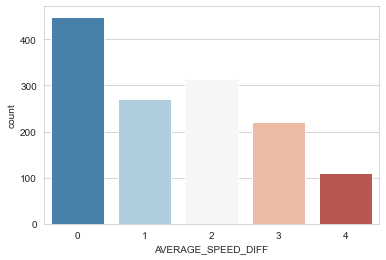

In [9]:
##Split dataset
from sklearn.model_selection import train_test_split

X = training_data.drop('AVERAGE_SPEED_DIFF', axis=1)
y = training_data['AVERAGE_SPEED_DIFF']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=132112)


sns.set_style('whitegrid')
#sns.countplot(x='speed', data =  pd.DataFrame(y_train, columns=['Survived']), palette='RdBu_r')
sns.countplot(x='AVERAGE_SPEED_DIFF', data = pd.DataFrame(y_test, columns=['AVERAGE_SPEED_DIFF']), palette='RdBu_r')


<AxesSubplot:xlabel='AVERAGE_SPEED_DIFF', ylabel='count'>

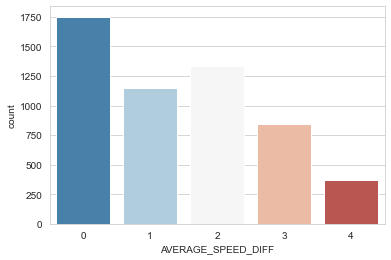

In [10]:
sns.countplot(x='AVERAGE_SPEED_DIFF', data = pd.DataFrame(y_train, columns=['AVERAGE_SPEED_DIFF']), palette='RdBu_r')

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
#DEEP LEARNING!
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

bclfr = Sequential()

bclfr.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim=17))

bclfr.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

bclfr.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'softmax'))

bclfr.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


ModuleNotFoundError: No module named 'keras'

In [ ]:
#Trainning

from tqdm.keras import TqdmCallback

bclfr.fit(X_train,y_train,batch_size=64, epochs =200,verbose=0, callbacks=[TqdmCallback(verbose=0)])

In [ ]:
test_data = test_data.drop(['record_date'], axis=1)
test_data = test_data.drop(['city_name'], axis=1)
#test_data = test_data.drop(['AVERAGE_CLOUDINESS'], axis=1)
test_data = test_data.drop(['AVERAGE_RAIN'], axis=1)
test_data = test_data.drop(['AVERAGE_PRECIPITATION'], axis=1)


test_data.replace(to_replace =r'^\s*$', 
                 value = 0.3, 
                regex=True,
                 inplace = True)

test_data["AVERAGE_CLOUDINESS"] = training_data["AVERAGE_CLOUDINESS"].fillna("MISSING VALUE")


test_data.replace(to_replace ="MISSING VALUE", 
                 value = 0.555555, 
                  inplace = True)

test_data.replace(to_replace ="céu claro", 
                 value = 0.999999, 
                  inplace = True)

test_data.replace(to_replace ="céu limpo", 
                 value = 0.999999, 
                  inplace = True)

test_data.replace(to_replace ="nuvens dispersas", 
                 value = 0.666666, 
                  inplace = True)


test_data.replace(to_replace ="algumas nuvens", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="céu pouco nublado", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="nuvens quebrados", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="nuvens quebradas", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="nublado", 
                 value = 0.333333, 
                  inplace = True)

test_data.replace(to_replace ="tempo nublado", 
                 value = 0.333333, 
                  inplace = True)

test_data.replace(to_replace ="NULL", 
                 value = 0.3, 
                  inplace = True)

#Agora temos de tratar da Luminosity

test_data.replace(to_replace ="DARK", 
                 value = 0.333333, 
                  inplace = True)

test_data.replace(to_replace ="LOW_LIGHT", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="LIGHT", 
                 value = 0.999999, 
                  inplace = True)



test_data.head()


#nan

# céu claro
#ceu limpo

#nuvens dispersas
#algumas nuvens
#ceu pouco nublado
#nuvens quebrados
#nuvens qubradas

#nublado
#tempo nublado


#Normalzie data

test_data['AVERAGE_FREE_FLOW_SPEED'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_FREE_FLOW_SPEED']).reshape(-1,1))
test_data['AVERAGE_TIME_DIFF'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_TIME_DIFF']).reshape(-1,1))
test_data['AVERAGE_FREE_FLOW_TIME'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_FREE_FLOW_TIME']).reshape(-1,1))
test_data['AVERAGE_TEMPERATURE'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_TEMPERATURE']).reshape(-1,1))
test_data['AVERAGE_ATMOSP_PRESSURE'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_ATMOSP_PRESSURE']).reshape(-1,1))
test_data['AVERAGE_HUMIDITY'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_HUMIDITY']).reshape(-1,1))
test_data['AVERAGE_WIND_SPEED'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_WIND_SPEED']).reshape(-1,1))
test_data.info()

In [ ]:
test_data.head()

In [ ]:
training_data.head()

In [ ]:
pred = bclfr.predict(test_data) 
#print(pred)

pred = np.argmax(pred, axis = 1)

df = pd.DataFrame(pred, columns = ['Speed_Diff'])
df_f = df.set_axis(["Speed_Diff"], axis=1)
df_f.index = df_f.index+1

df_f.replace(to_replace = 0, 
                 value = "None", 
                  inplace = True)
df_f.replace(to_replace = 1, 
                 value = "Low", 
                  inplace = True)
df_f.replace(to_replace = 2, 
                 value = "Medium", 
                  inplace = True)
df_f.replace(to_replace = 3, 
                 value = "High", 
                  inplace = True)
df_f.replace(to_replace = 4, 
                 value = "Very_High", 
                  inplace = True)
#df_f.info()

#print(df_f)
#df_f.count("Speed_Diff")
print(df_f["Speed_Diff"].head(50))
#df_f.to_csv("submission4_Deep.csv", index_label='RowId')


In [ ]:
pred = bclfr.predict(X) 
print(pred)

pred = np.argmax(pred, axis = 1)

df = pd.DataFrame(pred, columns = ['Speed_Diff'])
df_f = df.set_axis(["Speed_Diff"], axis=1)
df_f.index = df_f.index+1

df_f.replace(to_replace = 4, 
                 value = "None", 
                  inplace = True)
df_f.replace(to_replace = 3, 
                 value = "Low", 
                  inplace = True)
df_f.replace(to_replace = 2, 
                 value = "Medium", 
                  inplace = True)
df_f.replace(to_replace = 1, 
                 value = "High", 
                  inplace = True)
df_f.replace(to_replace = 0, 
                 value = "Very_High", 
                  inplace = True)

print(df_f["Speed_Diff"].head(50))